<a href="https://colab.research.google.com/github/jcriostorres/Polynomial-Regression/blob/main/Regresion_Polinomial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 2

Analice los siguientes métodos a la luz de la teoría vista para los modelos de regresión polinomial múltiple. Una vez comprenda su funcionamiento, proceda a completar el código del método de gradiente descendente para el problema de regresión. En este método se le pide escribir el código de la regla de actualización de los parámetros del algorítmo de gradiente descedente:

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$

y además se pide graficar el error cuadrático
medio (ECM) vs. las iteraciones del algorítmo. La gráfica debe llevar título y los correspondientes nombres de los ejes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from __future__ import division

In [ ]:
#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = sum((Y_est - Y)**2)/(2*N)
    return ecm

In [ ]:
#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #La variable Yest contiene la salida de f(X,W)

In [ ]:
#Potencia de polinomio
def potenciaPolinomio(X,grado):
    """
    Este método permite aumentar la matriz (base de datos de entrenamiento)
    de tal manera que se incluyan los términos con potencia mayores que 1
    de acuerdo al parámetro grado (M) que pase el usuario.
    """
    X2 = X

    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)

    return X2

In [ ]:
#Gradiente descendente para regresión polinomial
def gradiente_descendente(X, Y, grado, eta, iterations):
    """
    params:
    X: base de datos de entrenamiento (array de numpy)
    Y: variable de salida (array de numpy)
    grado: grado del polinomio (Natural mayor o igual a 1)
    eta: tasa de aprendizaje para el algoritmo de gradiente descendente
    (real mayor que cero. Ej: 0.001)
    iterations: número de iteraciones del algoritmo de gradiente descendente
    """
    # Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
    X = potenciaPolinomio(X, grado)

    # X es la matriz de datos extendida. W es el vector de parámetros del modelo
    # Extendemos la matriz
    unos = np.array([np.ones(np.size(X, 0))])
    # Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X, 0), np.size(X, 1))

    Y = Y.reshape(np.size(Y), 1)

    # Tomamos el número de variables del problema
    d = np.size(X, 1)

    # Tomamos el número de muestras de la base de datos
    N = np.size(X, 0)

    # Inicializamos el vector de parámetros aleatoriamente
    W = np.zeros(d)
    W = W.reshape(np.size(W), 1)

    eta = eta

    iteraciones = iterations
    ecms = np.zeros(iteraciones)

    for iter in range(iteraciones):
        error = ECM(regression(X, W), Y)
        ecms[iter] = error

        # Calculamos el gradiente de la función de error con respecto a W
        gradiente = np.dot(X.T, (regression(X, W) - Y)) / N

        # Actualizamos los parámetros del modelo
        W = W - eta * gradiente

    print('Vector de parámetros del modelo:\n')
    print(W)
    print('Longitud de W', len(W))
    error_final = str(np.min(ecms))
    print('\nError Final = ' + str(np.min(ecms)))

    # Graficar ECM vs. iteraciones
    plt.plot(range(iteraciones), ecms)
    plt.title('Error Cuadrático Medio vs. Iteraciones')
    plt.xlabel('Iteraciones')
    plt.ylabel('Error Cuadrático Medio')
    plt.grid(True)
    plt.show()

    return error_final

## Ejercicio 3

A continuación, se leen los datos de un problema de regresión que consiste en predecir el valor de la variable denominada total_UPDRS. Este conjunto de datos está compuesto por un conjunto de variable que consisten en medidas de la voz, tomadas a 42 personas con enfermedad de parkinson en etapa temprana. A partir de la predicción de la variable total_UPDRS se pueden tomar decisiones que pueden ayudar a afrontar este problema de salud. Para mayor información sobre le dataset y el problema, lea el archivo Documentación_Base_de_Datos o vaya a: https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring

In [ ]:
import pandas as pd

#cargamos la bd que está en un archivo txt y ahora la podemos manejar de forma matricial
db = pd.read_table('DB_Parkinson.txt', delimiter='\t')  # Assuming tab-delimiter
db.head()

C:\Users\kta_r\AppData\Local\Temp\ipykernel_14324\3504634490.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


A continuación las variables o caracterísicas son guardadas en la variable $X$ que posteriormente es estandarizada y la variable de salida o variable a predecir es guardada en la variable Y. Complete el código llamando a la función gradiente_descendente y pasándole los parámetros correspondientes. Debe obtener como salída el vector de parámetros W estimado y la gráfica del error cuadrático medio vs iteraciones.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = db.iloc[:,0:20].to_numpy()
Y = db.iloc[:,20].to_numpy()

#Estandarización de los datos
#La importancia de esto la veremos más adelante en el curso
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

#Partimos la base de datos en dos partes, una para entrenar y otra para validar.
#Esto lo veremos con mayor detalle más adelante en el curso.
X_train = X[0:4876,0:20]
Y_train = Y[0:4876]

X_test = X[4876:,0:20]
Y_test = Y[4876:]



In [ ]:
print(X_test.shape, Y_test.shape)
print(X_train.shape, Y_train.shape)

(999, 20) (999,)
(4876, 20) (4876,)


In [ ]:
print(X_test.shape, Y_test.shape)
print(X_train.shape, Y_train.shape)

(999, 20) (999,)
(4876, 20) (4876,)


C:\Users\kta_r\AppData\Local\Temp\ipykernel_14324\900760799.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ecms[iter] = error


Vector de parámetros del modelo:

[[9.78258791]
 [4.16318716]
 [6.35345298]
 [1.43738814]
 [4.34327798]
 [0.49004473]
 [0.90813374]
 [0.41611938]
 [0.36639317]
 [0.41665233]
 [1.11795799]
 [1.31934854]
 [0.92795288]
 [1.05891038]
 [0.90981491]
 [0.92774916]
 [0.32413097]
 [5.33572318]
 [4.79043373]
 [3.68846954]
 [2.80085367]]
Longitud de W 21

Error Final = 58.21774999420576


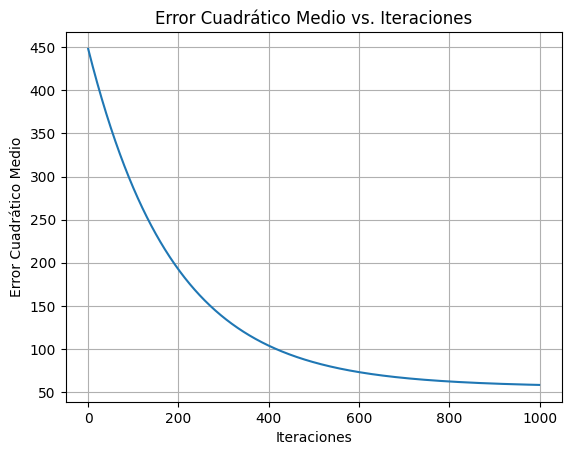

In [ ]:
eta = 0.001
grado = 1


#Complete la siguiente línea de código llamando el método gradiente_descendente
#con sus respectivos argumentos. Use solo las muestras marcadas para entrenamiento
#(X_train, Y_train). Use 1000 iteraciones para el laboratorio

Want = gradiente_descendente(X_train, Y_train, grado, eta, 1000)

3.1 Cuántas muestras tiene la base de datos?

In [ ]:
# Respuestas a las preguntas:
# 3.1
num_muestras = len(db)
print("Número de muestras en la base de datos:", num_muestras)


Número de muestras en la base de datos: 5875


3.2 Cuántas caracteristicas tiene el problema?

In [ ]:
# 3.2
num_caracteristicas = X.shape[1]
print("Número de características en el problema:", num_caracteristicas)

Número de características en el problema: 20


3.3 Cuál es el número de coeficientes w que se obtienen al ingresar un polinomio de grado 4? por qué?

In [ ]:
# 3.3
grado = 4
num_coeficientes = (grado * num_caracteristicas)+1

print("Número de coeficientes w para un polinomio de grado 4:", num_coeficientes)
# La razón por la que se calcula así es que para un polinomio de grado n, necesitamos considerar
# todas las combinaciones posibles de características hasta el grado n, y tener en cuenta el termino independiente que corresponde a W0

Número de coeficientes w para un polinomio de grado 4: 81


C:\Users\kta_r\AppData\Local\Temp\ipykernel_14324\900760799.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ecms[iter] = error


Vector de parámetros del modelo:

[[7.74279628e+00]
 [3.16386315e+00]
 [5.05661989e+00]
 [5.52153401e-01]
 [3.32331111e+00]
 [3.87676226e-01]
 [7.34197790e-01]
 [3.28353754e-01]
 [2.88864389e-01]
 [3.28775986e-01]
 [8.92589970e-01]
 [1.05387980e+00]
 [7.43139070e-01]
 [8.46673510e-01]
 [7.26562015e-01]
 [7.42978140e-01]
 [2.54600901e-01]
 [4.18482454e+00]
 [3.83289172e+00]
 [2.84015670e+00]
 [2.24578110e+00]
 [2.03217038e+00]
 [3.49929096e+00]
 [5.52153401e-01]
 [1.87518088e+00]
 [3.29396097e-02]
 [1.00588010e-01]
 [2.80168948e-02]
 [2.19838371e-02]
 [2.80498985e-02]
 [1.38341191e-01]
 [1.91227154e-01]
 [9.93365265e-02]
 [1.29100837e-01]
 [9.37558033e-02]
 [9.93053663e-02]
 [1.70896163e-02]
 [2.31245938e+00]
 [1.99071341e+00]
 [1.33378865e+00]
 [7.40926518e-01]
 [1.45095259e+00]
 [2.52984717e+00]
 [5.52153401e-01]
 [1.20470118e+00]
 [8.99769254e-03]
 [2.22244286e-02]
 [9.24995238e-03]
 [8.23178907e-03]
 [9.25220336e-03]
 [2.88554130e-02]
 [4.63403595e-02]
 [1.72434281e-02]
 [2.73536954

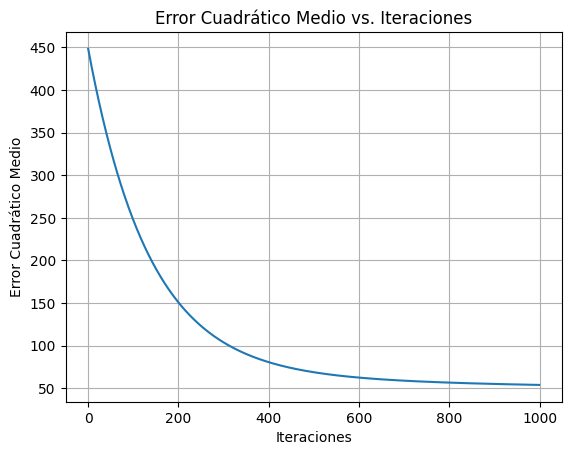

In [ ]:
# A continuación mostramos la longitud del vector w que se genera en el metodo gradiente_descendete
W = gradiente_descendente(X_train,Y_train,4,eta,1000)

3.4 Cuántas muestras se usarán para entrenar y cuántas para validar el modelo?

In [ ]:
# 3.4
num_muestras_entrenamiento = len(X_train)
num_muestras_validacion = len(X_test)
print("Número de muestras para entrenamiento:", num_muestras_entrenamiento)
print("Número de muestras para validación:", num_muestras_validacion)

Número de muestras para entrenamiento: 4876
Número de muestras para validación: 999


## Ejercicio 4

Identifique la variable "grado" (M según el modelo visto en clase) en el código anterior, cambie su valor de acuerdo a la siguiente tabla y complete la columna ECM.

<table>
  <tr>
    <th>Tasa de aprendizaje</th>
    <th>Grado del polinomio</th>
    <th>Error Cuadrático Medio (ECM)</th>
  </tr>
    
 <tr>
    <td>0.001</td>
    <td>1</td>
    <td>58.21774</td>
  </tr>
  <tr>
    <td>0.001</td>
    <td>2</td>
    <td>55.69581</td>
  </tr>
  <tr>
    <td>0.001</td>
    <td>3</td>
    <td>54.66678</td>
  </tr>
  <tr>
    <td>0.001</td>
    <td>4</td>
    <td>54.08291</td>
  </tr>
  <tr>
    <td>0.001</td>
    <td>5</td>
    <td>53.69796</td>
  </tr>
  
  <tr>
    <td>0.001</td>
    <td>6</td>
    <td>53.40897</td>
  </tr>
  <tr>
    <td>0.001</td>
    <td>7</td>
    <td>53.169056</td>
  </tr>
  <tr>
    <td>0.001</td>
    <td>8</td>
    <td>52.9569814</td>
  </tr>
  <tr>
    <td>0.001</td>
    <td>9</td>
    <td>52.7635088</td>
  </tr>
  <tr>
    <td>0.001</td>
    <td>10</td>
    <td>52.584815</td>
  </tr>
</table>



Tenga en cuenta que cuando el valor de $\eta$ sea $0.001$ y el grado del polinomio sea $5$, el valor del ECM debe ser $53.69796$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


## Ejericio 5

Con el mejor modelo entrenado (menor ECM), haga la predicción para todos las muestras X_test y calcule el ECM teniendo en cuenta los valores teóricos de salida Y_test.

C:\Users\kta_r\AppData\Local\Temp\ipykernel_14324\900760799.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ecms[iter] = error


Vector de parámetros del modelo:

[[ 7.50555367e+00]
 [ 3.00387239e+00]
 [ 4.90007523e+00]
 [ 1.57511663e-01]
 [ 3.20094891e+00]
 [ 3.77975601e-01]
 [ 7.29302647e-01]
 [ 3.19043152e-01]
 [ 2.80910802e-01]
 [ 3.19452615e-01]
 [ 8.69940863e-01]
 [ 1.02725228e+00]
 [ 7.24739431e-01]
 [ 8.25563477e-01]
 [ 7.09135818e-01]
 [ 7.24583504e-01]
 [ 2.45353824e-01]
 [ 4.03954277e+00]
 [ 3.74534501e+00]
 [ 2.77200351e+00]
 [ 2.20006611e+00]
 [ 1.92676056e+00]
 [ 3.38187972e+00]
 [ 1.57511663e-01]
 [ 1.79332459e+00]
 [ 3.12022431e-02]
 [ 1.00442422e-01]
 [ 2.64015161e-02]
 [ 2.03609316e-02]
 [ 2.64338043e-02]
 [ 1.33037020e-01]
 [ 1.84229779e-01]
 [ 9.59196247e-02]
 [ 1.23741177e-01]
 [ 9.04788203e-02]
 [ 9.58891928e-02]
 [ 1.38968513e-02]
 [ 2.21882569e+00]
 [ 1.95534229e+00]
 [ 1.30859245e+00]
 [ 7.29334149e-01]
 [ 1.37842977e+00]
 [ 2.44116127e+00]
 [ 1.57511663e-01]
 [ 1.14422409e+00]
 [ 8.04030487e-03]
 [ 2.19407342e-02]
 [ 8.36267940e-03]
 [ 7.36557998e-03]
 [ 8.36495126e-03]
 [ 2.62658654e-0

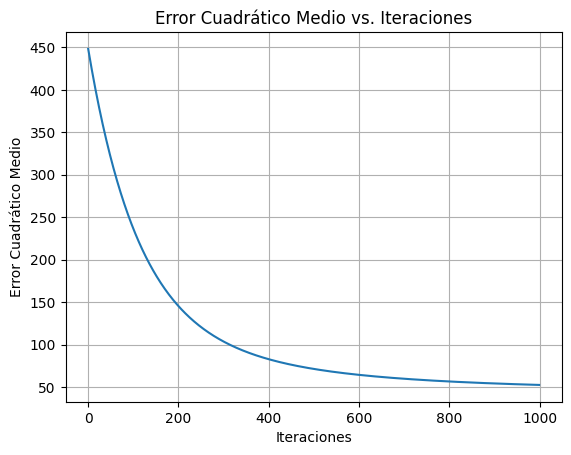

Vector de parámetros del modelo:

[[ 4.09600478e+00]
 [ 3.73538149e+00]
 [ 1.70901351e+00]
 [ 8.51067386e-01]
 [ 1.92314907e+00]
 [ 2.11215035e-01]
 [ 3.32971042e-01]
 [ 1.93148878e-01]
 [ 1.41656521e-01]
 [ 1.93378835e-01]
 [ 3.68445395e-01]
 [ 4.38118184e-01]
 [ 3.07608972e-01]
 [ 3.03746323e-01]
 [ 2.64304550e-01]
 [ 3.07515906e-01]
 [ 1.70101582e-01]
 [ 2.45754034e+00]
 [ 1.80284879e+00]
 [ 1.15548333e+00]
 [ 9.65554142e-01]
 [ 3.41230258e+00]
 [ 4.38294682e-01]
 [ 8.51067386e-01]
 [ 1.05250837e+00]
 [ 2.24759272e-02]
 [ 6.74203658e-02]
 [ 2.41924531e-02]
 [ 5.65666319e-03]
 [ 2.42082483e-02]
 [ 5.81679729e-02]
 [ 7.75438545e-02]
 [ 5.04119848e-02]
 [ 3.00089578e-02]
 [ 2.46027569e-02]
 [ 5.03966546e-02]
 [ 1.73909075e-02]
 [ 1.50876757e+00]
 [ 8.45341186e-01]
 [ 3.98307043e-01]
 [ 3.00886951e-01]
 [ 3.12273829e+00]
 [-2.62923946e-01]
 [ 8.51067386e-01]
 [ 6.28046582e-01]
 [ 4.11235321e-03]
 [ 2.85759782e-02]
 [ 6.29030672e-03]
 [-1.95735999e-03]
 [ 6.29122564e-03]
 [ 1.78265622e-0

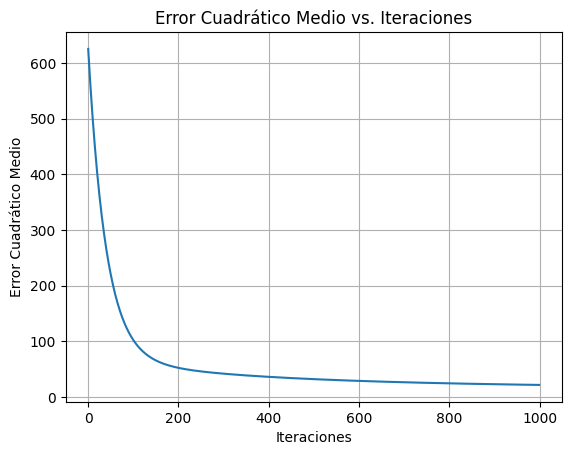

In [ ]:
#Escriba su código aquí

w_train = gradiente_descendente(X_train, Y_train, 10, 0.001, 1000)
w_test = gradiente_descendente(X_test, Y_test, 10, 0.001, 1000)

5.1 Qué diferencia nota en cuánto a los resultados en entrenamiento y en validación?

**R/:**

Se evidencia que el ECM en el conjunto de entrenamiento (52.58481583230228) es mayor que en el conjunto de validación (21.483886523398134).

Una de las caracteristicas que más sobresalen cuando se compara el compartamiento del error en relación con el número de iteraciones, es que en el caso de el conjunto de validación, el error cae de forma más acelerada, en comparación con el conjunto de entrenamiento.

5.2 Por qué cree que ocurre lo anterior?

R/: Una posible explicación de la diferencia de los valores de ECM en entrenamiento y validación puede estar relacionada con la cantidad de datos que tiene cada conjunto con que se corrió el modelo.
Se podría pensar, que desde la separación de los datos, se podría pensar, de que se debe encontrar una metodología adecuada para realizar dicha separación.

### Nota

Tenga en cuenta que los resultados de este modelo se pueden mejorar incrementando las iteraciones, pero realizaron 1000 para evitar altos costos computacionales.

---------------------------
# Interpretación

Los modelos de regresión polinomial múltiple son una extensión de la regresión lineal simple. En lugar de ajustar una línea recta a los datos, estos modelos permiten ajustar polinomios de grado superior. Esto puede ser útil cuando la relación entre las variables de entrada y de salida es no lineal.

El método del gradiente descendente es un algoritmo de optimización que se utiliza para minimizar una función objetivo iterativamente. En el contexto de la regresión, esta función objetivo es generalmente el error cuadrático medio. El gradiente descendente actualiza los parámetros del modelo (los coeficientes de la regresión) en cada iteración para moverse en la dirección del gradiente negativo de la función objetivo.

La regla de actualización de los parámetros es crucial en el gradiente descendente. En cada paso, los parámetros se actualizan de la siguiente manera:

```Python
parametro = parametro - tasa_de_aprendizaje * gradiente
```
Donde `tasa_de_aprendizaje` es un hiperparámetro que controla cuánto cambian los parámetros en cada actualización, y `gradiente` es el gradiente de la función objetivo con respecto al parámetro.

Aquí hay un ejemplo de cómo se podría implementar el gradiente descendente para la regresión polinomial múltiple en Python:

```python
import numpy as np

def gradiente_descendente(X, y, parametros, tasa_de_aprendizaje, num_iteraciones):
    m = len(y)
    historia_costo = []

    for i in range(num_iteraciones):
        prediccion = np.dot(X, parametros)
        error = prediccion - y
        gradiente = (1/m) * np.dot(X.T, error)
        parametros = parametros - tasa_de_aprendizaje * gradiente
        costo = (1/(2*m)) * np.dot(error.T, error)
        historia_costo.append(costo)

    return parametros, historia_costo
```

En este código, `X` es la matriz de características, y es el vector de salida, `parametros` son los parámetros del modelo, `tasa_de_aprendizaje` es la tasa de aprendizaje y `num_iteraciones` es el número de iteraciones para el algoritmo.


--------------
## Costos Computacionales
 Refiere a la cantidad de iteraciones realizadas en un algoritmo de aprendizaje automático, probablemente un algoritmo de optimización como el gradiente descendente.

Las iteraciones se refieren a cuántas veces el algoritmo pasa por el conjunto de datos de entrenamiento. Cada iteración, el algoritmo ajusta los parámetros del modelo (como los coeficientes en una regresión) para minimizar la función de pérdida.

Aumentar el número de iteraciones puede mejorar la precisión del modelo, ya que le da al algoritmo más oportunidades para aprender y ajustar los parámetros. Sin embargo, también aumenta el costo computacional, ya que cada iteración requiere tiempo y recursos de procesamiento.